# Email Spam Detection With Machine Learning

Task: We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email
that is sent to a massive number of users at one time, frequently containing cryptic
messages, scams, or most dangerously, phishing content.

In this Project, use Python to build an email spam detector. Then, use machine learning to
train the spam detector to recognize and classify emails into spam and non-spam. Let’s get
started!

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

## Importing Dataset

In [2]:
data = pd.read_csv("spam.csv", encoding='ISO-8859-1')
# The default encoding UTF-8 encountering 'UnicodeDecodeError' ,
# to resolve this issue I have used 'ISO-8859-1' (also known as 'latin1') and 'cp1252' encoding. 

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
data.shape

(5572, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [8]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [9]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [10]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
data=data.rename(columns={'v1':'Target', 'v2':'Message'})

In [12]:
data

,Target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
data.isnull().sum()

Target     0
Message    0
dtype: int64

In [14]:
data.duplicated().sum()

403

In [15]:
data.drop_duplicates(inplace=True)

In [16]:
data.duplicated().sum()

0

In [17]:
data.size

10338

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
encoder = LabelEncoder()

In [20]:
data['Target'] = encoder.fit_transform(data['Target'])

In [21]:
data['Target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5169, dtype: int32

In [22]:
data

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [23]:
sns.set()

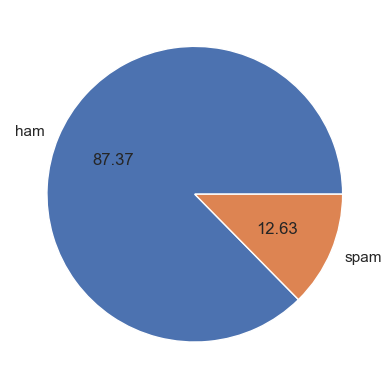

In [24]:
plt.pie(data['Target'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

In [25]:
# Importing NLTK(natural language tool kit) for natural language processing
import nltk
from nltk.corpus import stopwords # For stopwords
# Downloading NLTK data
nltk.download ('stopwords') # Downloading stopwords data
nltk.download ('punkt') # Downloading tokenizer data

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
data['num_characters'] = data['Message'].apply(len)
data['num_words'] = data[ 'Message'].apply(lambda x: len(nltk.word_tokenize(x)))
data['num_sentence'] = data['Message'].apply (lambda x: len(nltk.sent_tokenize(x)))

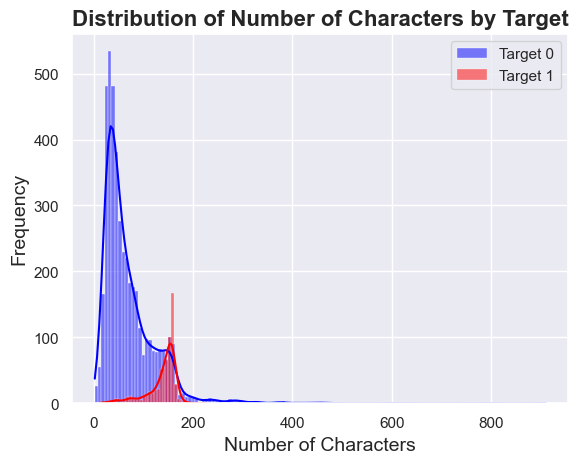

In [27]:
#Plot the histogram for target 0 in blue
sns.histplot(data[data['Target'] == 0]['num_characters'], color='blue', label = 'Target 0', kde=True)

#Plot the histogram for target 1 in red
sns.histplot(data[data['Target'] == 1]['num_characters'], color='red', label= 'Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend ()

# Show the plot
plt.show()

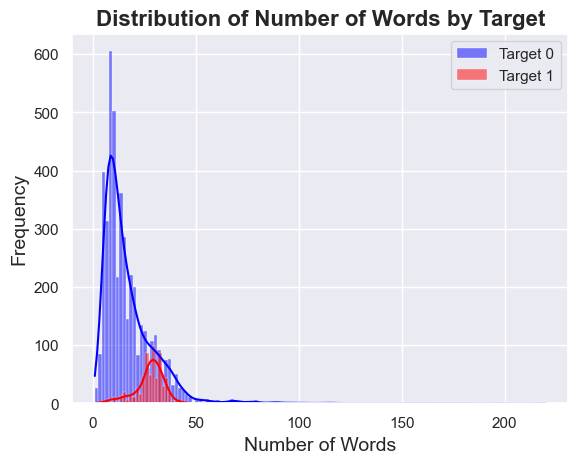

In [28]:
#Plot the histogram for target 0 in blue
sns.histplot(data[data['Target'] == 0]['num_words'], color='blue', label = 'Target 0', kde=True)

#Plot the histogram for target 1 in red
sns.histplot(data[data['Target'] == 1]['num_words'], color='red', label= 'Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Words by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend ()

# Show the plot
plt.show()

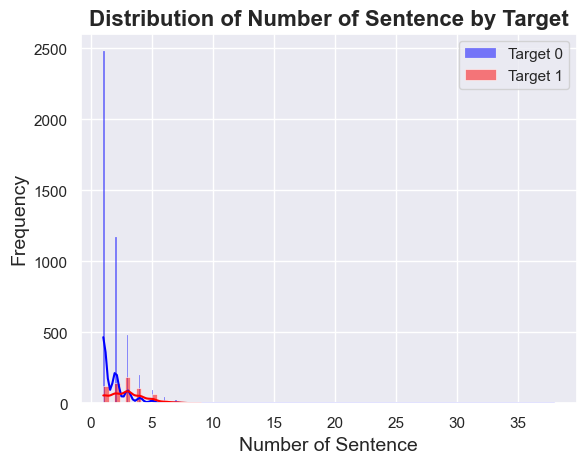

In [29]:
#Plot the histogram for target 0 in blue
sns.histplot(data[data['Target'] == 0]['num_sentence'], color='blue', label = 'Target 0', kde=True)

#Plot the histogram for target 1 in red
sns.histplot(data[data['Target'] == 1]['num_sentence'], color='red', label= 'Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Sentence', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Sentence by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend ()

# Show the plot
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_17904\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

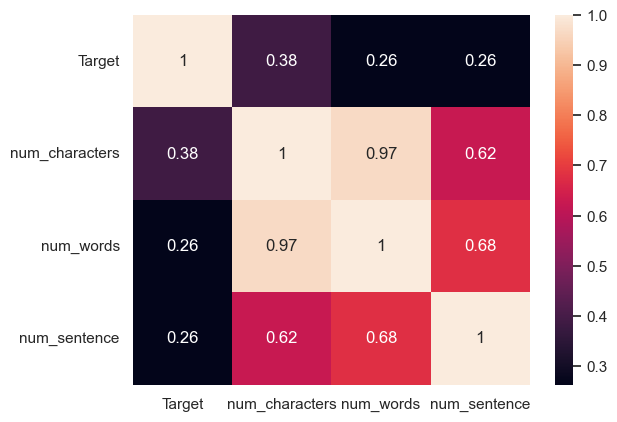

In [30]:
sns.heatmap(data.corr(),annot=True)

In [31]:
# !pip install wordcloud

In [32]:
from wordcloud import WordCloud

In [33]:
# Importing the Porter Stemmer for text stemming
from nltk.stem.porter import PorterStemmer

# Importing the string module for handling special characters
import string

# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()
    
    # Tokenization using NLTK
    text = nltk.word_tokenize(text)
    
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    # Removing stop words and punctuation
    text = y[:]
    y.clear()
    
    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if (i not in stopwords.words('english')) and(i not in string.punctuation):
            y.append(i)
        
    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    # Join the processed tokens back into a single string
    return " ".join(y)

In [34]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')
data['transformed_text'] = data['Message'].apply(transform_text)

In [35]:
data.head(5)

,Target,Message,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


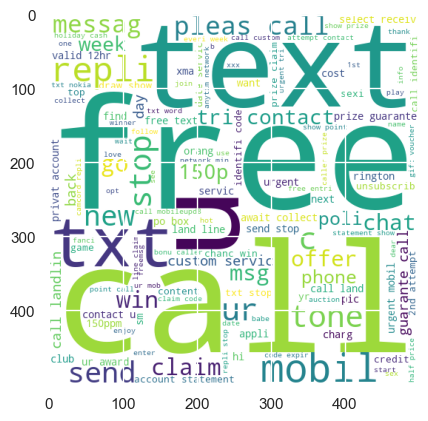

In [36]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color = 'white')
spam_wc = wc.generate(data[data['Target'] == 1]['transformed_text'].str.cat(sep=' '))
plt.imshow(spam_wc)
plt.show()

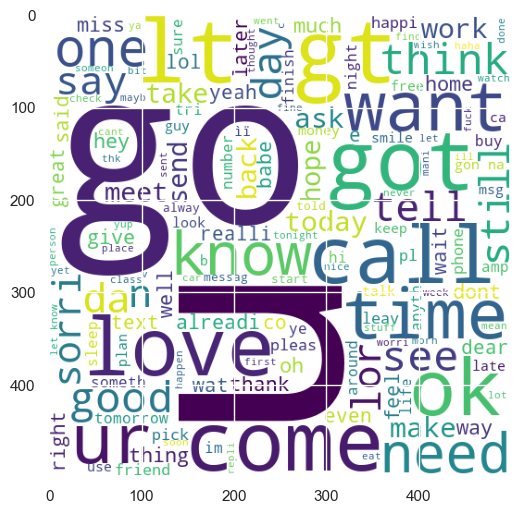

In [37]:
ham_wc = wc.generate(data[data['Target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.show()

In [38]:
x = data['Message']
y = data['Target']

In [39]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5169, dtype: object

In [40]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5169, dtype: int32

In [41]:
x_train, x_test, y_train, y_test= train_test_split (x, y, test_size=0.2, random_state=3) #splitting data into train and test

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

In [43]:
cv=CountVectorizer()

In [44]:
x_train_cv = cv.fit_transform(x_train)
x_test_cv = cv.transform(x_test)

In [45]:
print(x_train_cv)

  (0, 1879)	1
  (0, 1170)	1
  (0, 6840)	1
  (0, 6610)	1
  (0, 2779)	1
  (1, 1939)	1
  (1, 4467)	1
  (1, 453)	1
  (1, 7176)	1
  (1, 7594)	1
  (1, 1577)	1
  (1, 203)	1
  (1, 4768)	1
  (1, 7175)	1
  (1, 7390)	1
  (1, 7590)	1
  (1, 4309)	1
  (1, 5157)	1
  (1, 3732)	1
  (1, 3015)	1
  (1, 2333)	1
  (1, 5210)	1
  (1, 4577)	1
  (1, 4731)	1
  (1, 5615)	1
  :	:
  (4134, 3290)	2
  (4134, 4817)	1
  (4134, 1546)	1
  (4134, 4195)	1
  (4134, 891)	1
  (4134, 1092)	1
  (4134, 1261)	1
  (4134, 7302)	1
  (4134, 6595)	1
  (4134, 1624)	1
  (4134, 1977)	1
  (4134, 7438)	1
  (4134, 6189)	1
  (4134, 6815)	1
  (4134, 2357)	1
  (4134, 4093)	1
  (4134, 6583)	1
  (4134, 5934)	1
  (4134, 1661)	1
  (4134, 5153)	1
  (4134, 6292)	1
  (4134, 3707)	1
  (4134, 6172)	1
  (4134, 3624)	1
  (4134, 4785)	1


In [46]:
model = LogisticRegression() #creating model

In [47]:
model.fit(x_train_cv,y_train)
prediction_train = model.predict(x_train_cv)

In [48]:
print(accuracy_score(y_train, prediction_train)*100)

99.75816203143893


In [49]:
prediction_test= model.predict(x_test_cv)

In [50]:
print(accuracy_score(y_test, prediction_test)*100)

97.58220502901354
